BASE MODEL KURULUMU

Veride hiçbir iyileştirme yapmadan base model kuruyoruz ve iyileştirmeler yaptıktan sonra çıktılarını karşılaştıracağız. Random Forest kullanıldı.




In [1]:
# Gerekli Kütüphane ve Fonksiyonlar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
# from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import warnings
warnings.simplefilter(action="ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
#pd.set_option('display.max_rows', 20)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv("C:/Users/HP/Desktop/Diyabet tahmin projesi/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [3]:
y = df["Outcome"]
X = df.drop("Outcome", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)


In [4]:
rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [5]:
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}") # basarı oranı
print(f"Recall: {round(recall_score(y_pred,y_test),3)}") # Gercekte diyabet olanların kacına diyabet dedigi
print(f"Precision: {round(precision_score(y_pred,y_test), 2)}") # Recall'in tam tersi. Model tarafından tahmin edilen degerlerin kac tanesi diyabet
print(f"F1: {round(f1_score(y_pred,y_test), 2)}") # Recall ve precision ortalaması
print(f"Auc: {round(roc_auc_score(y_pred,y_test), 2)}") # farklı sınıflandırma esik degerlerine göre basarı

Accuracy: 0.77
Recall: 0.706
Precision: 0.59
F1: 0.64
Auc: 0.75


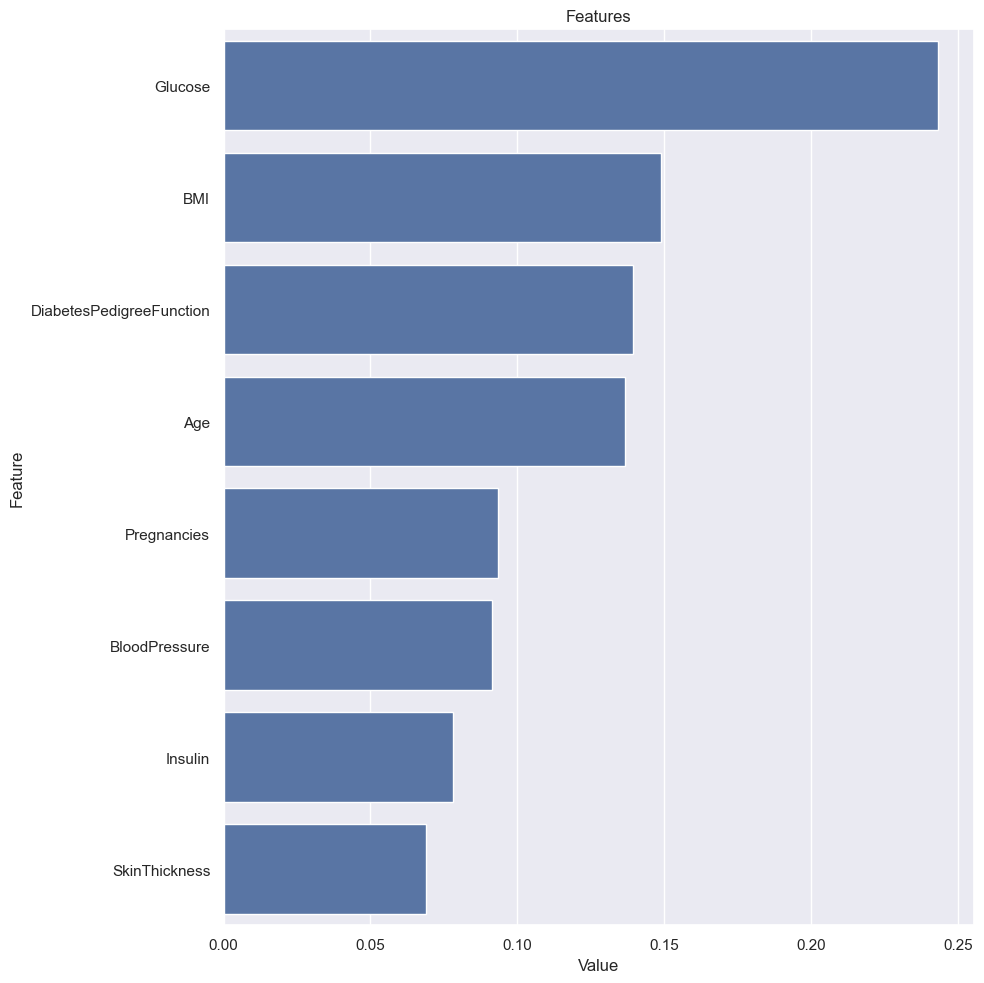

In [6]:
# Model hangi değişkene daha cok önem varmiş?
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(rf_model, X)


 Feature Engineering Sonrası Model      
 Accuracy: 0.79          
 Recall: 0.711             
 Precision: 0.67               
 F1: 0.69                      
 Auc: 0.77                   

 Base Model                        
 Accuracy: 0.77                 
 Recall: 0.706                
 Precision: 0.59                  
 F1: 0.64                               
 Auc: 0.75                 